<a href="https://colab.research.google.com/github/JarekMaleszyk/data-science-bootcamp/blob/master/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [364]:
!rm -rf "/content/international_trade_march"
DIRECTORY='international_trade_march'
import os
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    print(f"Directory '{DIRECTORY}' created successfully.")

Directory 'international_trade_march' created successfully.


In [365]:
import os
ZIP_FILE_NAME = 'international-trade-march-2024-quarter.zip'
if os.path.exists(ZIP_FILE_NAME):
  os.remove(ZIP_FILE_NAME)
else:
  print(f"The file {ZIP_FILE_NAME} does not exist")

!wget -P "/content/international_trade_march" "https://www.stats.govt.nz/assets/Uploads/International-trade/International-trade-March-2024-quarter/Download-data/international-trade-march-2024-quarter.zip"

The file international-trade-march-2024-quarter.zip does not exist
--2024-08-22 09:12:47--  https://www.stats.govt.nz/assets/Uploads/International-trade/International-trade-March-2024-quarter/Download-data/international-trade-march-2024-quarter.zip
Resolving www.stats.govt.nz (www.stats.govt.nz)... 45.60.11.104
Connecting to www.stats.govt.nz (www.stats.govt.nz)|45.60.11.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16398428 (16M) [application/zip]
Saving to: ‘/content/international_trade_march/international-trade-march-2024-quarter.zip’

international-trade 100%[===================>]  15.64M  91.9MB/s    in 0.2s    

2024-08-22 09:12:48 (91.9 MB/s) - ‘/content/international_trade_march/international-trade-march-2024-quarter.zip’ saved [16398428/16398428]



In [366]:
!unzip -o "/content/international_trade_march/international-trade-march-2024-quarter.zip" -d "/content/international_trade_march"

Archive:  /content/international_trade_march/international-trade-march-2024-quarter.zip
  inflating: /content/international_trade_march/country_classification.csv  
  inflating: /content/international_trade_march/goods_classification.csv  
  inflating: /content/international_trade_march/output_csv_full.csv  
  inflating: /content/international_trade_march/revised.csv  
  inflating: /content/international_trade_march/services_classification.csv  


Read and clean main data from csv:

In [367]:
import pandas as pd
try:
  output_csv_full = pd.read_csv('/content/international_trade_march/output_csv_full.csv', header=0)
  print('File read successfully')
except FileNotFoundError:
  print('File not found.')

File read successfully


In [368]:
output_csv_full.product_type = output_csv_full.product_type.astype('category')
# output_csv_full.product_type.cat.categories
output_csv_full.country_code = output_csv_full.country_code.astype('category')
# output_csv_full.country_code.cat.categories

In [369]:
print(output_csv_full.head())

   time_ref  account code country_code product_type        value status
0    202403  Exports   00           AE        Goods  325056709.0      F
1    202403  Exports   00           AG        Goods     860461.0      F
2    202403  Exports   00           AI        Goods      39213.0      F
3    202403  Exports   00           AL        Goods      79812.0      F
4    202403  Exports   00           AM        Goods     814215.0      F


In [370]:
# output_csv_full.loc[202403]
# output_csv_full[(output_csv_full['time_ref'] == 202403) & (output_csv_full['product_type'] == 'Goods')][['time_ref', 'country_code', 'value']]
duplicate_rows = output_csv_full.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [371]:
# ?str.replace
# output_csv_full['value'] = output_csv_full['value'].fillna(0, inplace=True)
rows_with_nulls = output_csv_full.isna()
print("Number of duplicate rows:", rows_with_nulls.sum())

Number of duplicate rows: time_ref             0
account              0
code                 0
country_code      1488
product_type         0
value           142195
status               0
dtype: int64


In [372]:
# output_csv_full.sort_values(by=['value'], inplace=True, ascending=False)

In [373]:
print(output_csv_full.country_code.isna().value_counts())

country_code
False    2281595
True        1488
Name: count, dtype: int64


In [374]:
output_csv_full.dropna(subset=['country_code'], inplace=True) #drop wierszy z nullami w kolumnie country_code
print(output_csv_full.country_code.isna().value_counts())

country_code
False    2281595
Name: count, dtype: int64


In [375]:
output_csv_full[output_csv_full.value.isna() == True]

,time_ref,account,code,country_code,product_type,value,status
20084,202403,Exports,A12,AD,Services,NaN,C
20085,202403,Exports,A12,AE,Services,NaN,C
20100,202403,Exports,A12,BB,Services,NaN,C
20116,202403,Exports,A12,BZ,Services,NaN,C
20132,202403,Exports,A12,CY,Services,NaN,C
...,...,...,...,...,...,...,...
2283012,201406,Imports,A12122,MX,Services,NaN,C
2283034,201406,Imports,A12123,AE,Services,NaN,C
2283039,201406,Imports,A12123,BB,Services,NaN,C
2283054,201406,Imports,A12123,ID,Services,NaN,C


In [376]:
output_csv_full.value = output_csv_full.value.fillna(0) #0 zamiast null/nan
output_csv_full.value.info()

<class 'pandas.core.series.Series'>
Index: 2281595 entries, 0 to 2283082
Series name: value
Non-Null Count    Dtype  
--------------    -----  
2281595 non-null  float64
dtypes: float64(1)
memory usage: 34.8 MB


In [377]:
output_csv_full['year'] = output_csv_full['time_ref'].astype(str).str[:4].astype(int)
output_csv_full['month'] = output_csv_full['time_ref'].astype(str).str[4:6].astype(int)

In [378]:
output_csv_full['date'] = pd.to_datetime(output_csv_full[['year', 'month']].assign(day=1))

In [379]:
try:
  output_csv_full = output_csv_full.drop(columns=['time_ref', 'year', 'month'])
except:
  print('Columns already dropped')

Read and clean countries dictionary from csv:

In [380]:
try:
  country_classification = pd.read_csv('/content/international_trade_march/country_classification.csv', header=0)
  print('File read successfully')
except FileNotFoundError:
  print('File not found.')

File read successfully


In [381]:
country_classification.country_code = country_classification.country_code.astype('category')
country_classification.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   country_code   257 non-null    category
 1   country_label  258 non-null    object  
dtypes: category(1), object(1)
memory usage: 12.8+ KB


Merge and clean:

In [382]:
merged_data = output_csv_full.merge(country_classification, on='country_code', how='left')

In [383]:
merged_data.drop(merged_data[merged_data.country_label.isna() == True].index, inplace=True) #usunięcie niespasowanych rekordów

In [384]:
merged_data = merged_data.reset_index(drop=True)

Read and clean goods classification dictionary from csv:

In [385]:
try:
  goods_classification = pd.read_csv('/content/international_trade_march/goods_classification.csv', header=0)
  print('File read successfully')
except FileNotFoundError:
  print('File not found.')

File read successfully


Read and clean services classification dictionary from csv:

In [386]:
try:
  services_classification = pd.read_csv('/content/international_trade_march/services_classification.csv', header=0)
  print('File read successfully')
except FileNotFoundError:
  print('File not found.')

File read successfully


In [387]:
services_classification.code = services_classification.code.astype('category')

Merge:

In [388]:
merged_data = merged_data.merge(services_classification, on='code', how='left')

In [389]:
merged_data.loc[merged_data.service_label.isna() == True, 'service_label'] = 'Unknown' #fill nulls with 'Unknown'

In [390]:
merged_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281414 entries, 0 to 2281413
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   account        2281414 non-null  object        
 1   code           2281414 non-null  object        
 2   country_code   2281414 non-null  object        
 3   product_type   2281414 non-null  category      
 4   value          2281414 non-null  float64       
 5   status         2281414 non-null  object        
 6   date           2281414 non-null  datetime64[ns]
 7   country_label  2281414 non-null  object        
 8   service_label  2281414 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), object(6)
memory usage: 141.4+ MB


In [391]:
merged_data_exports = merged_data[merged_data['account'] == 'Exports']

In [392]:
merged_data_imports = merged_data[merged_data['account'] == 'Imports']

Create export/import analysis per every month

In [393]:
# merged_data.date.min() #Timestamp('2014-06-01 00:00:00')
# merged_data.date.max() #Timestamp('2024-03-01 00:00:00')
merged_data_exports_sum = merged_data_exports.groupby(['country_code','date'])['value'].sum().reset_index()
merged_data_exports_sum = merged_data_exports_sum.rename(columns={'value': 'export_value'})
merged_data_imports_sum = merged_data_imports.groupby(['country_code','date'])['value'].sum().reset_index()
merged_data_imports_sum = merged_data_imports_sum.rename(columns={'value': 'import_value'})

In [394]:
start, stop = merged_data.date.min(), merged_data.date.max()
canvas: pd.DataFrame =  pd.date_range(start, stop, freq="MS") #tworzy kalendarz
canvas = pd.DataFrame(canvas, columns=['date'])

In [395]:
data_with_export_sum = canvas.merge(merged_data_exports_sum, on=['date'], how='left')
data_with_export_sum.export_value = data_with_export_sum.export_value.fillna(0)
data_with_export_import_sum = data_with_export_sum.merge(merged_data_imports_sum, on=['country_code', 'date'], how='left')
data_with_export_import_sum.import_value = data_with_export_import_sum.import_value.fillna(0)

In [396]:
data_with_export_import_sum['income'] = data_with_export_import_sum.export_value - data_with_export_import_sum.import_value

In [400]:
data_with_export_import_sum[data_with_export_import_sum['country_code'] == 'AD']

,date,country_code,export_value,import_value,income
0,2014-06-01,AD,164198.0,0.0,164198.0
235,2014-09-01,AD,44824.0,297.0,44527.0
464,2014-12-01,AD,132750.0,0.0,132750.0
698,2015-03-01,AD,519209.0,137400.0,381809.0
929,2015-06-01,AD,211893.0,55404.0,156489.0
1384,2015-12-01,AD,339128.0,0.0,339128.0
1621,2016-03-01,AD,278828.0,5715.0,273113.0
1849,2016-06-01,AD,644422.0,15366.0,629056.0
2312,2016-12-01,AD,153236.0,20145.0,133091.0
2546,2017-03-01,AD,220095.0,321937.0,-101842.0


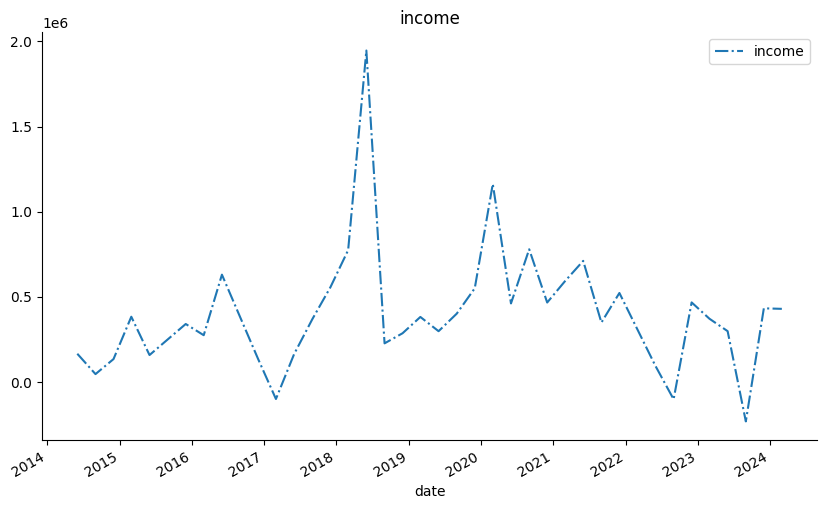

In [410]:
from matplotlib import pyplot as plt
data_with_export_import_sum[data_with_export_import_sum['country_code'] == 'AD'].plot(kind='line',
                                                                                      x='date',
                                                                                      y='income',
                                                                                      figsize=(10, 6),
                                                                                      title='income',
                                                                                      linestyle='dashdot')
plt.gca().spines[['top', 'right']].set_visible(False)